<a href="https://colab.research.google.com/github/chandan-m-chandu/Basic-Machine-Learning-Projects-/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OOUTLIER DETECTION**

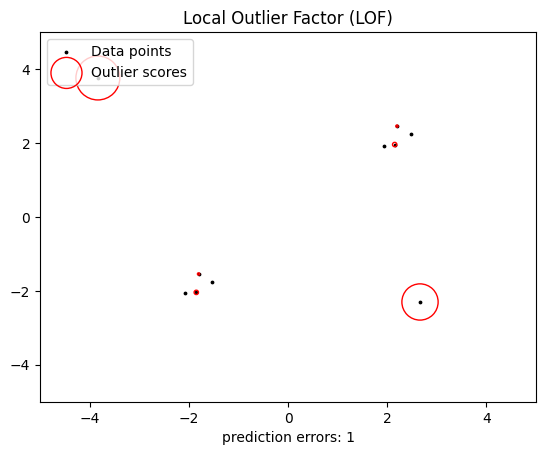

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)
# Generate train data
X_inliers = 0.3 * np.random.randn(4, 2) #100 4 -smaples
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(2, 2)) #20
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() -
X_scores.min())
plt.scatter(
X[:, 0],
X[:, 1],
s=1000 * radius, #s=1000
edgecolors="r",
facecolors="none",
label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()

Try changing the number of samples, number of neighbors for finding

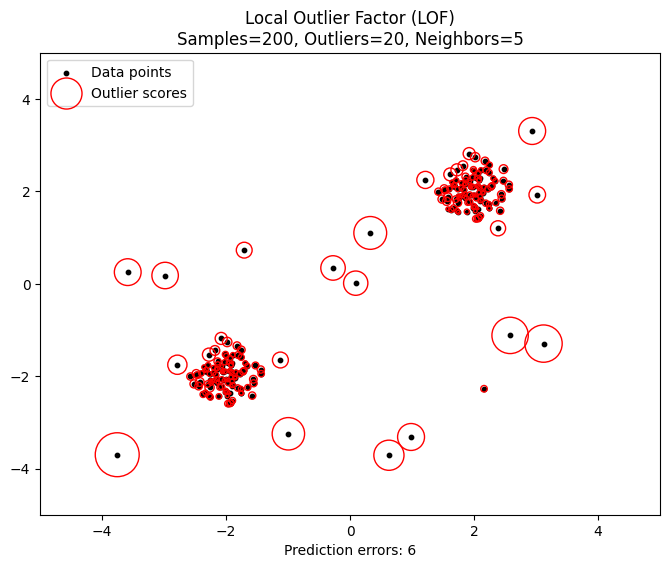

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Set random seed
np.random.seed(42)

# Changeable Parameters
n_samples = 200  # Total inlier samples
n_outliers = 20  # Number of outliers
n_neighbors = 5  # Number of neighbors for LOF

# Generate inliers (normal points)
X_inliers = 0.3 * np.random.randn(n_samples // 2, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]  # Shift some clusters

# Generate outliers (abnormal points)
X_outliers = np.random.uniform(low=-4, high=4, size=(n_outliers, 2))

# Combine data
X = np.r_[X_inliers, X_outliers]

# Ground truth labels: 1 for inliers, -1 for outliers
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# Apply LOF
clf = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=n_outliers / len(X))

# Predict inliers (+1) and outliers (-1)
y_pred = clf.fit_predict(X)

# Compute the outlier scores (negative LOF scores)
X_scores = clf.negative_outlier_factor_

# Count misclassified points
n_errors = (y_pred != ground_truth).sum()

# Visualization
plt.figure(figsize=(8, 6))
plt.title(f"Local Outlier Factor (LOF)\nSamples={n_samples}, Outliers={n_outliers}, Neighbors={n_neighbors}")

# Scatter plot of data points
plt.scatter(X[:, 0], X[:, 1], color="k", s=10, label="Data points")

# Plot outlier scores (circle size represents how extreme the outlier is)
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,  # Size of circles proportional to LOF score
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)

# Display settings
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel(f"Prediction errors: {n_errors}")
plt.legend(loc="upper left")
plt.show()
